### Kelompok 4_Final Project 1

Nama Kelompok: 
1. Karina Jeanne Natasya
2. Maulida Afifah
3. Kenny Oktavianus U Sibarani

# Project Overview

   Dataset yang digunakan adalah dataset sampel penyedia layanan perjalanan yaitu Uber & Lyft yang diperoleh dari Kaggle. Dataset tersebut tersebut memuat data perjalanan taksi Uber dan Lyft di Boston, MA. Dataset ini memiliki 57 atribut yang cukup lengkap seperti data cuaca, suhu, angin, dan posisi matahari. Namun dari banyaknya atribut data, hanya akan diambil 10 yang paling relevan untuk dieksplorasi dengan menggunakan metode Regresi Linear.

Tujuan dari dataset ini adalah memprediksi perbedaan harga dari penggunaan layanan perjalanan Uber dan Lyft. 

Objek yang akan dianalisis berupa harga berdasarkan 10 atribut yang paling revelan dari dataset. 

Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:

    ● Mampu memahami konsep regression dengan Linear Regression

    ● Mampu mempersiapkan data untuk digunakan dalam model Linear Regression

    ● Mampu mengimplementasikan Linear Regression untuk membuat prediksi


# Import Library

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import Ridge, Lasso
from scipy import stats

pd.set_option('display.max_columns', 500)

# Data Loading

In [2]:
# Import dataset 
uberxlyft = pd.read_csv('rideshare_kaggle.csv')

In [8]:
uberxlyft.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [9]:
x = uberxlyft['product_id']
x

0                                    lyft_line
1                                 lyft_premier
2                                         lyft
3                                  lyft_luxsuv
4                                    lyft_plus
                          ...                 
693066    6f72dfc5-27f1-42e8-84db-ccc7a75f6969
693067    55c66225-fbe7-4fd5-9072-eab1ece5e23e
693068    8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a
693069    6d318bcc-22a3-4af6-bddd-b409bfce1546
693070    997acbb5-e102-41e1-b155-9df7de0a73f2
Name: product_id, Length: 693071, dtype: object

In [10]:
uberxlyft = uberxlyft[['hour', 'day', 'month','cab_type', 'name', 'product_id', 'price', 'distance', 'surge_multiplier']]

    Dari dataset 'rideshare_kaggle.csv' kami hanya mengambil 9 data yang menurut kami relevan dan dapat dilakukan modeling  data.

In [11]:
uberxlyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              693071 non-null  int64  
 1   day               693071 non-null  int64  
 2   month             693071 non-null  int64  
 3   cab_type          693071 non-null  object 
 4   name              693071 non-null  object 
 5   product_id        693071 non-null  object 
 6   price             637976 non-null  float64
 7   distance          693071 non-null  float64
 8   surge_multiplier  693071 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 47.6+ MB


In [12]:
uberxlyft.head()

,hour,day,month,cab_type,name,product_id,price,distance,surge_multiplier
0,9,16,12,Lyft,Shared,lyft_line,5.0,0.44,1.0
1,2,27,11,Lyft,Lux,lyft_premier,11.0,0.44,1.0
2,1,28,11,Lyft,Lyft,lyft,7.0,0.44,1.0
3,4,30,11,Lyft,Lux Black XL,lyft_luxsuv,26.0,0.44,1.0
4,3,29,11,Lyft,Lyft XL,lyft_plus,9.0,0.44,1.0


In [13]:
uberxlyft.describe()

,hour,day,month,price,distance,surge_multiplier
count,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000
mean,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870
std,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000
25%,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000
75%,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000


In [14]:
uberxlyft.describe(include = 'object')

,cab_type,name,product_id
count,693071,693071,693071
unique,2,13,13
top,Uber,UberXL,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
freq,385663,55096,55096


In [15]:
uberxlyft.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [16]:
uberxlyft.query('product_id == "997acbb5-e102-41e1-b155-9df7de0a73f2"').cab_type.value_counts()

Uber    55091
Name: cab_type, dtype: int64

In [17]:
# Ukuran dataset(baris, kolom)
uberxlyft.shape

(693071, 9)

In [18]:
# Menampilakan 10 data teratas
uberxlyft.head(10)

,hour,day,month,cab_type,name,product_id,price,distance,surge_multiplier
0,9,16,12,Lyft,Shared,lyft_line,5.0,0.44,1.0
1,2,27,11,Lyft,Lux,lyft_premier,11.0,0.44,1.0
2,1,28,11,Lyft,Lyft,lyft,7.0,0.44,1.0
3,4,30,11,Lyft,Lux Black XL,lyft_luxsuv,26.0,0.44,1.0
4,3,29,11,Lyft,Lyft XL,lyft_plus,9.0,0.44,1.0
5,18,17,12,Lyft,Lux Black,lyft_lux,16.5,0.44,1.0
6,5,26,11,Lyft,Lyft XL,lyft_plus,10.5,1.08,1.0
7,19,2,12,Lyft,Lux Black,lyft_lux,16.5,1.08,1.0
8,6,3,12,Lyft,Shared,lyft_line,3.0,1.08,1.0
9,10,27,11,Lyft,Lux Black XL,lyft_luxsuv,27.5,1.08,1.0


In [19]:
# Daftar nama nama kolom pada dataset
uberxlyft.columns.values

array(['hour', 'day', 'month', 'cab_type', 'name', 'product_id', 'price',
       'distance', 'surge_multiplier'], dtype=object)

In [20]:
# Info setiap kolom (missing value dan tipe data)
uberxlyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              693071 non-null  int64  
 1   day               693071 non-null  int64  
 2   month             693071 non-null  int64  
 3   cab_type          693071 non-null  object 
 4   name              693071 non-null  object 
 5   product_id        693071 non-null  object 
 6   price             637976 non-null  float64
 7   distance          693071 non-null  float64
 8   surge_multiplier  693071 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 47.6+ MB


    Pada kolom 'Price' terdapat sejumlah missing value yang harus diatasi sebelum data dieksplorasi lebih lanjut.  

# Data Cleaning 
### Mengatasi Missing Value

In [21]:
# Mengecek jumlah missing value di setiap kolom
uberxlyft.isnull().sum()

hour                    0
day                     0
month                   0
cab_type                0
name                    0
product_id              0
price               55095
distance                0
surge_multiplier        0
dtype: int64

    Dari data diatas hanya kolom price yang memiliki nilai null. Maka untuk mengatasi missing value tersebut dapat diisi dengan menggunakan nilai mean dari data kolom price. 

In [22]:
uberxlyft = uberxlyft[uberxlyft['price'].notna()]

In [23]:
uberxlyft.isnull().sum()

hour                0
day                 0
month               0
cab_type            0
name                0
product_id          0
price               0
distance            0
surge_multiplier    0
dtype: int64

    Dari data diatas dapat kita lihat bahwa seluruh data tidak ada lagi yang memiliki nilai null.

In [24]:
uberxlyft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   cab_type          637976 non-null  object 
 4   name              637976 non-null  object 
 5   product_id        637976 non-null  object 
 6   price             637976 non-null  float64
 7   distance          637976 non-null  float64
 8   surge_multiplier  637976 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 48.7+ MB


In [25]:
uberxlyft.head()

,hour,day,month,cab_type,name,product_id,price,distance,surge_multiplier
0,9,16,12,Lyft,Shared,lyft_line,5.0,0.44,1.0
1,2,27,11,Lyft,Lux,lyft_premier,11.0,0.44,1.0
2,1,28,11,Lyft,Lyft,lyft,7.0,0.44,1.0
3,4,30,11,Lyft,Lux Black XL,lyft_luxsuv,26.0,0.44,1.0
4,3,29,11,Lyft,Lyft XL,lyft_plus,9.0,0.44,1.0


In [26]:
uberxlyft.describe(include = 'object')

,cab_type,name,product_id
count,637976,637976,637976
unique,2,12,12
top,Uber,UberXL,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
freq,330568,55096,55096


In [27]:
uberxlyft.query('product_id == "997acbb5-e102-41e1-b155-9df7de0a73f2"').cab_type.value_counts()

Uber    55091
Name: cab_type, dtype: int64

    Sudah tidak terdapat missing value pada dataset.

### Mengatasi Data Duplikat

In [28]:
# Mengecek apakah pada dataset terdapat data duplikat
uberxlyft.duplicated().sum()

88663

    Dataset ini masih memiliki data yang nilainya duplikat. Maka dari itu, data duplikat harus dihilangkan agar preprocesing dapat berjalan.

In [29]:
dup = uberxlyft[uberxlyft.duplicated()]
print(dup)

        hour  day  month cab_type       name  \
1841       6   27     11     Lyft        Lux   
3055      22   28     11     Lyft    Lyft XL   
3057       2   29     11     Lyft  Lux Black   
3348       3   27     11     Uber      UberX   
4052      10   28     11     Uber  Black SUV   
...      ...  ...    ...      ...        ...   
693044     1   29     11     Uber  Black SUV   
693045     1   29     11     Uber   UberPool   
693048     1   29     11     Lyft     Shared   
693057     1   29     11     Uber      Black   
693063     5    2     12     Uber  Black SUV   

                                  product_id  price  distance  \
1841                            lyft_premier   16.5      2.05   
3055                               lyft_plus   13.5      2.15   
3057                                lyft_lux   22.5      2.15   
3348    55c66225-fbe7-4fd5-9072-eab1ece5e23e   10.5      2.84   
4052    6d318bcc-22a3-4af6-bddd-b409bfce1546   31.5      3.08   
...                              

In [30]:
uberxlyft.drop_duplicates(inplace=True)

In [31]:
uberxlyft.duplicated().sum()

0

    Setelah dilakukan proses penghapusan data duplikat pada dataset menggunakan fungsi .drop_duplicates() , maka sudah tidak terdapat lagi data duplikat pada dataset.

In [32]:
# Mengecek unique value dan jumlah nama penyedia layanan pada kolom 'cab_type'
uberxlyft['cab_type'].value_counts()

Uber    282684
Lyft    266629
Name: cab_type, dtype: int64

In [33]:
uberxlyft.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    48437
6c84fd89-3f11-4782-9b50-97c468b19529    48044
6d318bcc-22a3-4af6-bddd-b409bfce1546    47948
997acbb5-e102-41e1-b155-9df7de0a73f2    47393
lyft_luxsuv                             46011
55c66225-fbe7-4fd5-9072-eab1ece5e23e    45438
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    45424
lyft_line                               44822
lyft_plus                               44488
lyft                                    44036
lyft_premier                            43661
lyft_lux                                43611
Name: product_id, dtype: int64

In [34]:
uberxlyft_ = pd.get_dummies(uberxlyft)
uberxlyft_.head()

,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,9,16,12,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,27,11,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,28,11,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,29,11,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [35]:
uberxlyft.query('product_id == "997acbb5-e102-41e1-b155-9df7de0a73f2"').cab_type.value_counts()

Uber    47393
Name: cab_type, dtype: int64

In [36]:
# Mengecek nama produk yang disediakan uber dan lyft
uberxlyft['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2'], dtype=object)

In [37]:
uberxlyft.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    48437
6c84fd89-3f11-4782-9b50-97c468b19529    48044
6d318bcc-22a3-4af6-bddd-b409bfce1546    47948
997acbb5-e102-41e1-b155-9df7de0a73f2    47393
lyft_luxsuv                             46011
55c66225-fbe7-4fd5-9072-eab1ece5e23e    45438
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    45424
lyft_line                               44822
lyft_plus                               44488
lyft                                    44036
lyft_premier                            43661
lyft_lux                                43611
Name: product_id, dtype: int64

In [38]:
uberxlyft.query('product_id == "997acbb5-e102-41e1-b155-9df7de0a73f2"').cab_type.value_counts()

Uber    47393
Name: cab_type, dtype: int64

# Explorasi data

In [39]:
# melihat matriks korelasi antar variabel dalam DataFrame
uberxlyft.corr()

C:\Users\kenny\AppData\Local\Temp\ipykernel_26676\4159319302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  uberxlyft.corr()


,hour,day,month,price,distance,surge_multiplier
hour,1.000000,0.068904,-0.082243,0.001202,0.003114,0.000045
day,0.068904,1.000000,-0.856894,0.005291,0.006209,0.006127
month,-0.082243,-0.856894,1.000000,-0.006001,-0.005959,-0.006186
price,0.001202,0.005291,-0.006001,1.000000,0.351233,0.248372
distance,0.003114,0.006209,-0.005959,0.351233,1.000000,0.020913
surge_multiplier,0.000045,0.006127,-0.006186,0.248372,0.020913,1.000000


C:\Users\kenny\AppData\Local\Temp\ipykernel_26676\3661712101.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(uberxlyft.corr(), annot =True)


<AxesSubplot: >

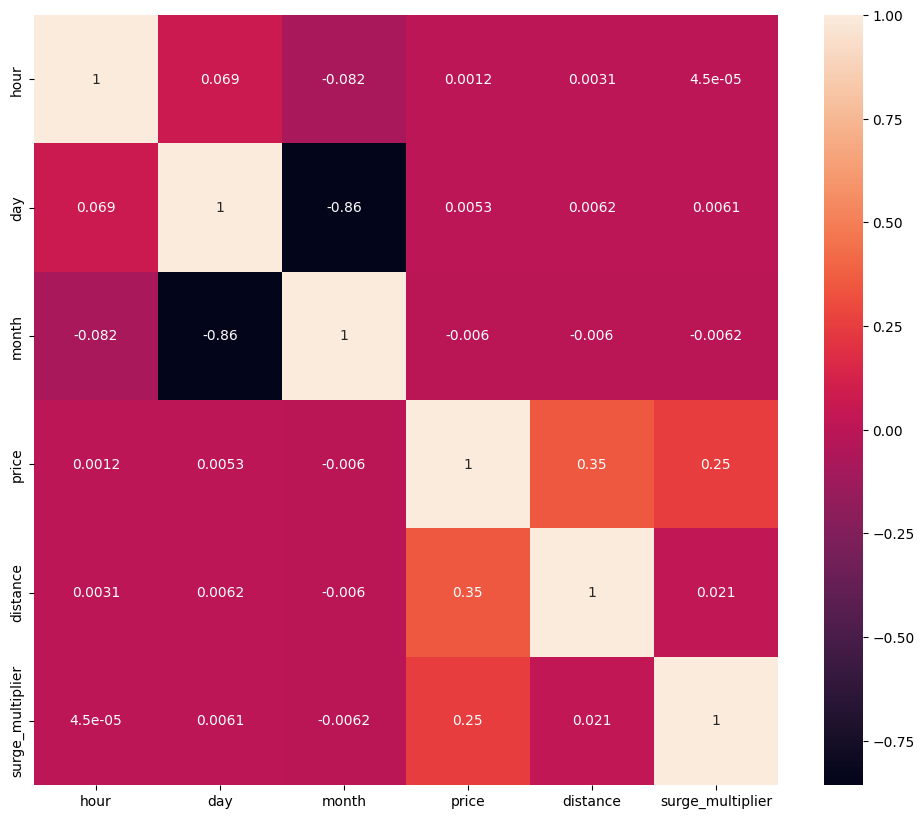

In [40]:
# visualisasi matriks korelasi
plt.figure(figsize = (12,10))
sns.heatmap(uberxlyft.corr(), annot =True)

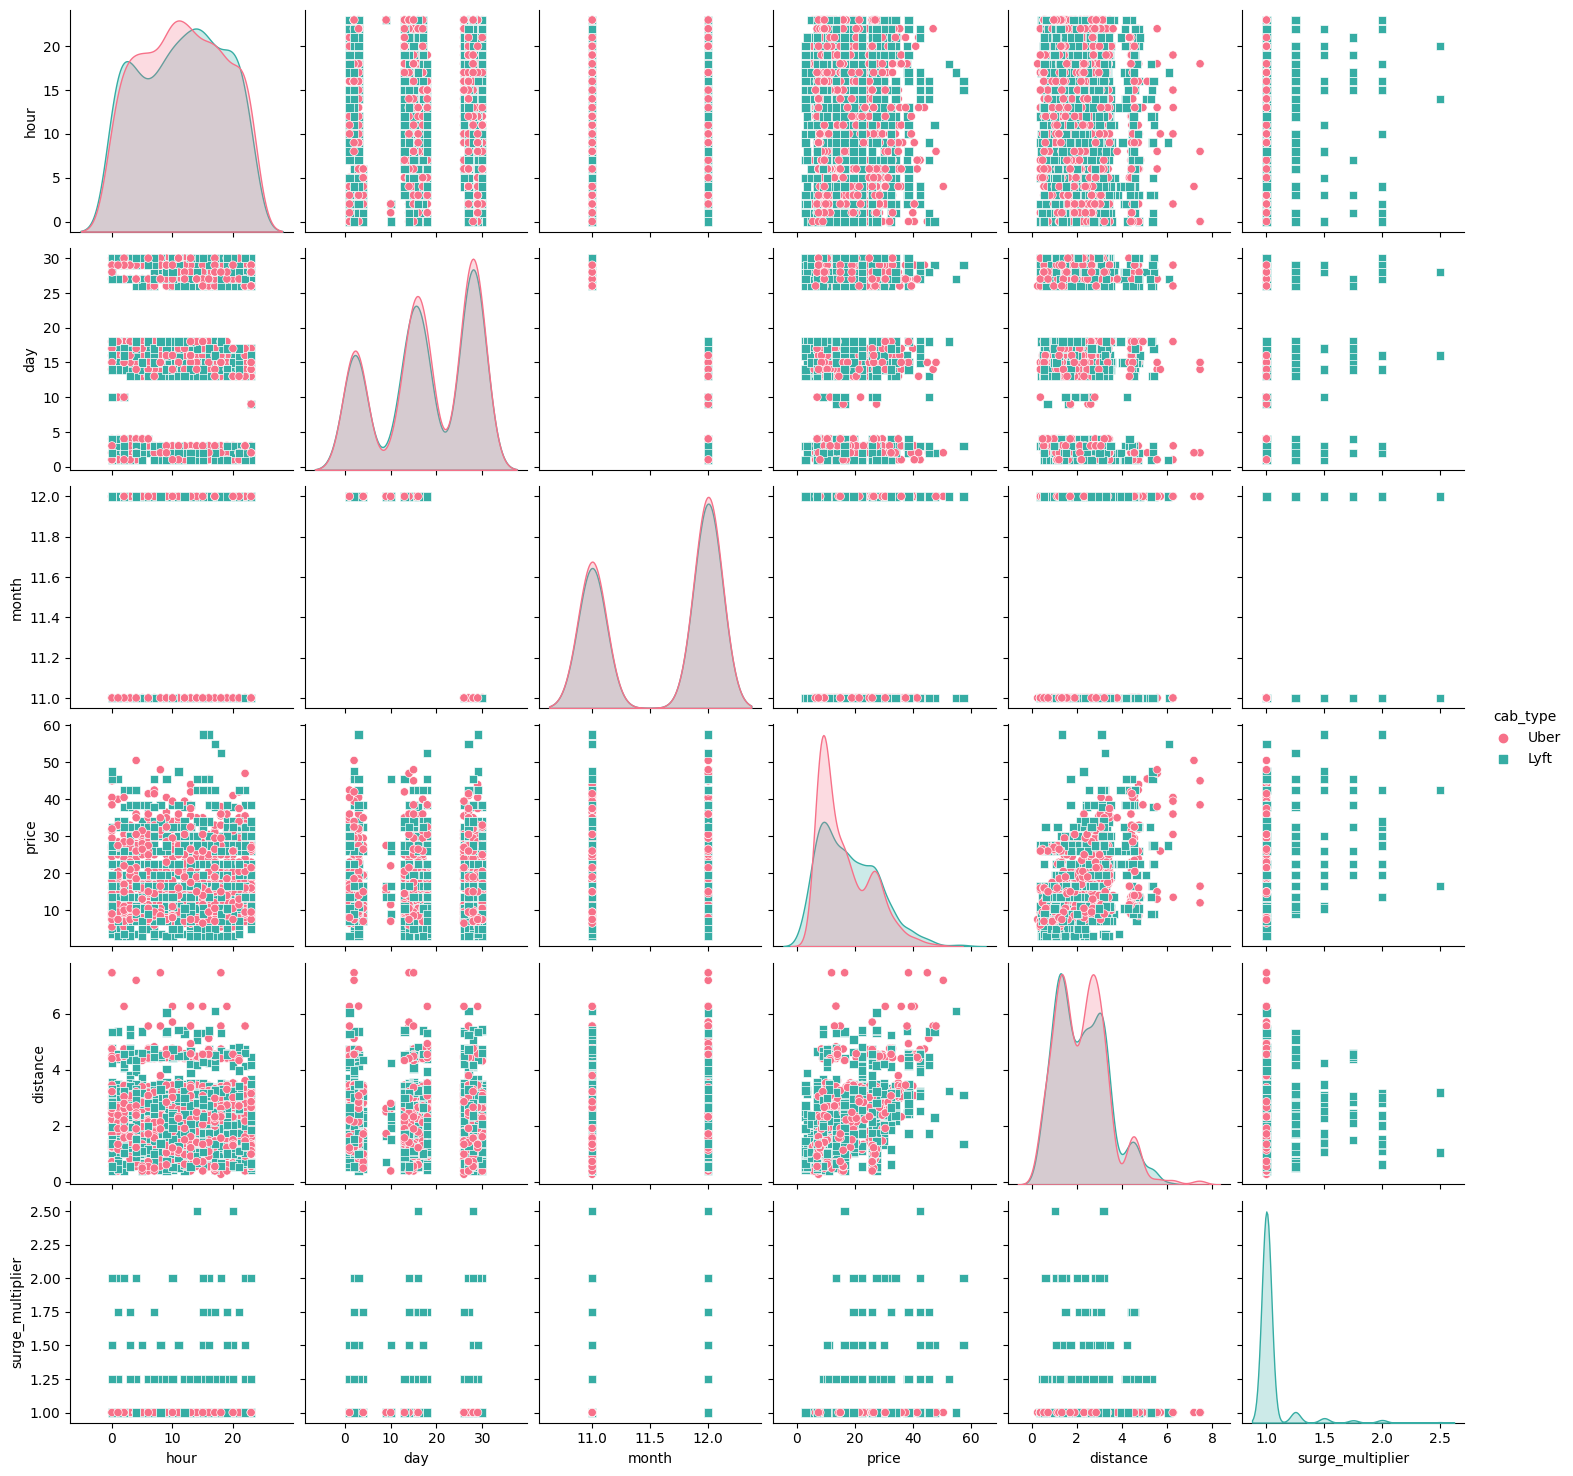

In [41]:
# Pairplot dengan mengambil 2000 sample, memberikan gambaran visual tentang hubungan antara variabel-variabel dalam dataset
sns_pairplot=sns.pairplot(uberxlyft.sample(2000), hue="cab_type", markers=["o","s"],diag_kind="kde",kind="scatter",palette="husl")

In [42]:
# Melakukan grouping dan menghitung rata-rata harga perjalanan berdasarkan cab_type
average_price = uberxlyft.groupby('cab_type')['price'].mean()
print(average_price)

cab_type
Lyft    17.668528
Uber    16.117803
Name: price, dtype: float64


0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
693065      Night
693066      Night
693067      Night
693069      Night
693070      Night
Name: hour, Length: 549313, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

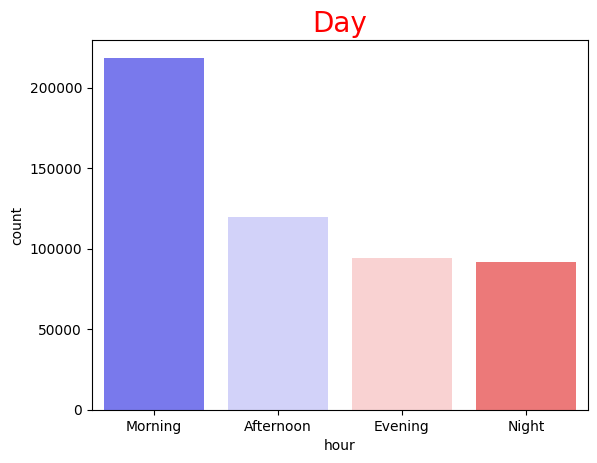

In [43]:
# membuat plot jumlah perjalanan berdasarkan waktu hari
day=pd.cut(x=uberxlyft.hour,bins=[0,10,15,19,23],labels = ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Day',color='r', fontsize = 20)
sns.countplot(x=day, palette="bwr")
day

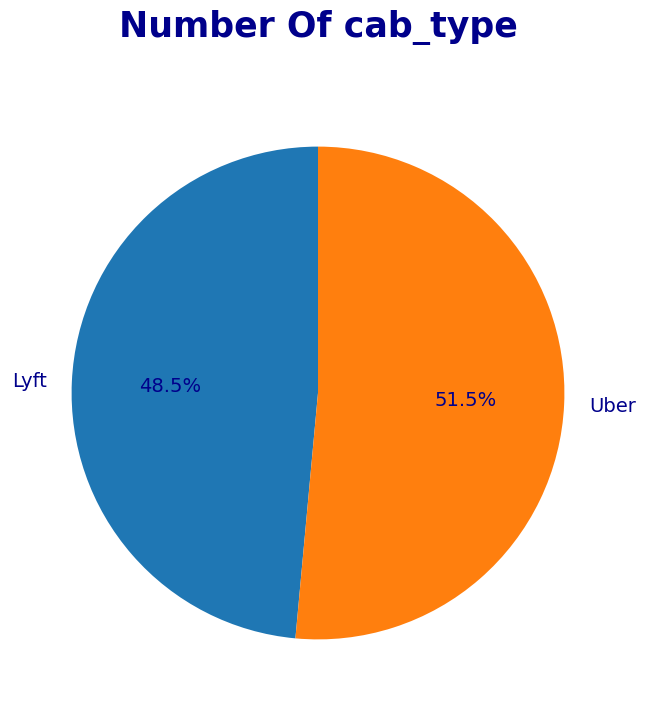

In [44]:
font1 = {'color':  'darkblue',
        'weight': 'bold',
        'size': 25,
        }

lables=uberxlyft['cab_type'].unique()

sizes=uberxlyft.groupby(['cab_type']).size()
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.title('Number Of cab_type\n',fontdict=font1)
ab=plt.pie(sizes, labels=lables, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'darkblue'})
plt.show()

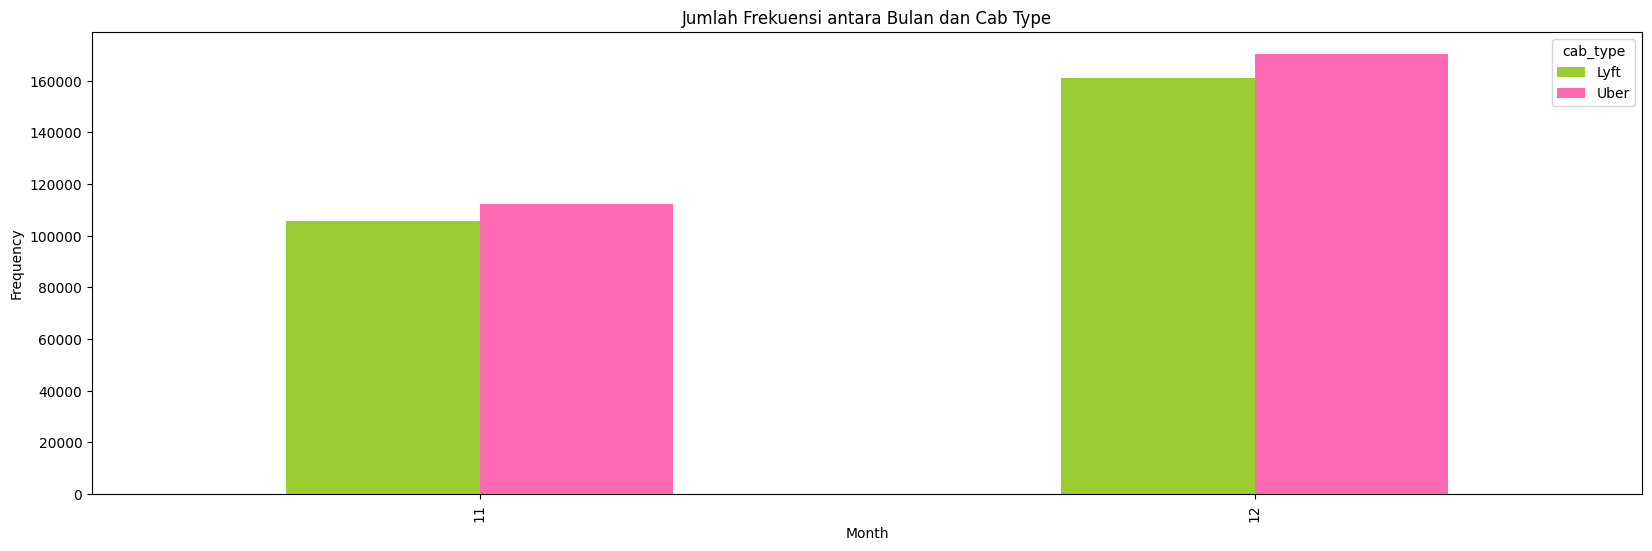

In [45]:
# Membuat bar plot berdasarkan jumlah frekuensi antara month dan cab_type
ax = pd.crosstab(uberxlyft.month, uberxlyft.cab_type).plot(kind="bar", figsize=(20, 6), color=['#9ACD32', '#FF69B4'])

# Memberikan judul pada plot
plt.title('Jumlah Frekuensi antara Bulan dan Cab Type')

# Memberikan label pada sumbu x dan sumbu y
plt.xlabel('Month')
plt.ylabel('Frequency')

# Menyimpan plot sebagai file gambar dengan nama "heartDiseaseAndAges.png"
plt.savefig('heartDiseaseAndAges.png')

# Menampilkan plot
plt.show()

# Data Preprocessing

In [46]:
uberxlyft.head()

,hour,day,month,cab_type,name,product_id,price,distance,surge_multiplier
0,9,16,12,Lyft,Shared,lyft_line,5.0,0.44,1.0
1,2,27,11,Lyft,Lux,lyft_premier,11.0,0.44,1.0
2,1,28,11,Lyft,Lyft,lyft,7.0,0.44,1.0
3,4,30,11,Lyft,Lux Black XL,lyft_luxsuv,26.0,0.44,1.0
4,3,29,11,Lyft,Lyft XL,lyft_plus,9.0,0.44,1.0


In [109]:
# mengubah data menjadi numerik menggunakan One-Hot Encoding
unl_new = pd.get_dummies(uberxlyft)
unl_new.head()

,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,9,16,12,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,27,11,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,28,11,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,29,11,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


    One-Hot Encoding adalah teknik yang digunakan untuk mengubah variabel kategorikal menjadi representasi numerik yang 
    dapat digunakan dalam algoritma pembelajaran mesin. Teknik ini umumnya digunakan saat bekerja dengan data kategorikal 
    yang tidak dapat langsung digunakan dalam model matematis.
    
    Penggunaan fungsi pd.get_dummies() dari pustaka Pandas. Fungsi ini digunakan untuk melakukan One-Hot Encoding pada 
    suatu DataFrame. DataFrame unl_new akan diubah menjadi representasi numerik dengan menghasilkan kolom baru untuk 
    setiap nilai unik dalam variabel kategorikal.
    
    Pada hasilnya, unl_new.head() akan menampilkan lima baris pertama dari DataFrame yang telah diubah menggunakan 
    One-Hot Encoding. Kolom-kolom baru akan mewakili nilai-nilai unik dari variabel kategorikal dalam bentuk 
    biner (0 atau 1), di mana nilai 1 menunjukkan kehadiran nilai tersebut dalam baris yang bersangkutan, dan 
    nilai 0 menunjukkan ketidakhadirannya.

In [110]:
# normalisasi data
scaler= StandardScaler()
unl_new = pd.DataFrame(scaler.fit_transform(unl_new),columns=unl_new.columns)

    Menggunakan StandardScaler untuk melakukan normalisasi data. StandardScaler adalah metode normalisasi yang menggunakan 
    skor z-score untuk mengubah data menjadi distribusi standar dengan mean 0 dan variansi 1.
    
    Normalisasi ini bermanfaat dalam memastikan bahwa fitur-fitur numerik memiliki skala yang seragam, yang dapat 
    meningkatkan kinerja model pembelajaran mesin yang menggunakan jarak atau perhitungan numerik dalam prosesnya.

In [111]:
x = unl_new.drop(columns='price')
y = unl_new['price']

In [112]:
# Memisahkan data menjadi train set dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

1. x: Variabel input (fitur) dari keseluruhan dataset.
2. y: Variabel target (label) dari keseluruhan dataset.
3. test_size=0.2: berfungsi menentukan proporsi ukuran test set dalam dataset. Dalam contoh ini, test set akan 
   memiliki ukuran 20% dari ukuran keseluruhan dataset.
4. random_state=42: berfungsi digunakan untuk mengatur seed (bilangan acak awal) agar hasil pemisahan dataset 
   ini dapat direproduksi dengan cara yang sama setiap kali kode dijalankan.
    
        Train set digunakan untuk melatih model, sedangkan test set 
        digunakan untuk menguji performa model pada data yang 
        belum pernah dilihat sebelumnya.

# Pendefinisian Model

In [113]:
# Logistic Regression model
lr = LinearRegression()

Linear regression adalah salah satu metode statistik yang paling umum digunakan untuk memodelkan hubungan linier antara variabel dependen dan independen.
Dataset rideshare_kaggle.csv hanya bisa menggunakan linear regression karena sifat variabel dependen atau target yang bersifat kontinu dan memiliki hubungan linier dengan variabel independen. Variabel dependen dalam dataset ini adalah fare_amount, yang merupakan jumlah biaya yang dikenakan pada pelanggan untuk perjalanan tertentu. Sedangkan variabel independen terdiri dari beberapa faktor seperti jarak perjalanan, waktu perjalanan, jumlah penumpang, dan lokasi penjemputan dan tujuan.

# Pelatihan Model

In [114]:
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [115]:
# Menampilkan jumlah data dalam setiap set
print("Jumlah data dalam train set:", len(x_train))
print("Jumlah data dalam test set:", len(x_test))

Jumlah data dalam train set: 439450
Jumlah data dalam test set: 109863


# Evaluasi Model

In [116]:
# Logistic Regression model
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
score = r2_score(y_test,y_pred_lr)

print('R2 dari Model Linear Regression =>',score)
print('Mean Squaref Error =>',mean_squared_error(y_test,y_pred_lr))
print('Root Mean Squared Error=>',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


R2 dari Model Linear Regression => 0.923941507643029
Mean Squaref Error => 0.07655245750620732
Root Mean Squared Error=> 0.2766811477246097


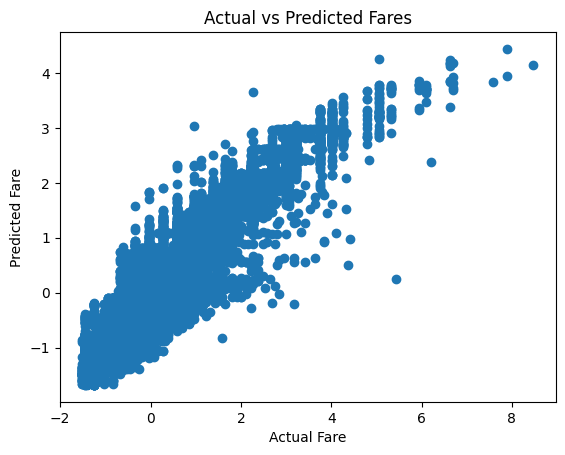

In [117]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fares")
plt.show()

### Untuk melakukan visualisasi tahap evaluasi mode, digunakan Scatter Plot karena Scatter Plot merupakan jenis plot yang cocok untuk merepresentasikan hubungan antara dua variabel numerik. Pada dataset rideshare_kaggle.csv, scatter plot dapat digunakan untuk merepresentasikan hubungan antara jarak tempuh dan biaya perjalanan. Dengan menggunakan scatter plot, kita dapat melihat pola atau tren dalam data.

# Model Inference

In [174]:
X_to_test = uberxlyft.copy()

In [175]:
to_inference = {'cab_type' : ['Lyft', 'Uber'],
                'product_id' : ['lyft_premier', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'],
                'distance' : [0.8, 0.9],
                'surge_multiplier' : [1, 1],
                'hour' : [8, 9],
                'day' : [10, 20],
                'month' : [9, 10]}

In [176]:
pd.DataFrame(to_inference)

,cab_type,product_id,distance,surge_multiplier,hour,day,month
0,Lyft,lyft_premier,0.8,1,8,10,9
1,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0.9,1,9,20,10


In [177]:
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [178]:
X_to_test = pd.get_dummies(X_to_test)
X_to_test = X_to_test[-2:]
X_to_test

,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
549313,8,10,9,NaN,0.8,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
549314,9,20,10,NaN,0.9,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [179]:
X_to_test = X_to_test.drop(columns = 'price')

In [180]:
price = lr.predict(X_to_test)

In [181]:
price

array([ 2.26498615e+11, -2.05002670e+11])

# Kesimpulan

##### Pada dataset "rideshare_kaggle.csv" dapat kita lihat bahwa terdapat data yang sangat besar. Data yang ada dalam dataset ini memiliki banyak nilai null maupun nilai yang duplikat. 

#### Oleh karena itu dilakukanlah proses Cleaning Data untuk mendapatkan data yang bersih dan bisa dipakai untuk tahapan modeling selanjutnya. Pada tahap modeling, digunakan beberapa grafik plot untuk dapat merepresentasikan data dalam bentuk visual untuk mempermudah dalam menganalisis data tersebut. 

#### Setelah dilakukannya tahap pemodelan, maka data tersebut di preprocessing dengan membagi data set menjadi data training dan data test. Selanjutnya dipilih model algoritma yang paling cocok untuk data set ini, yaitu model algoritma Linear Regression dan didapat nilai R2 akurasi sebesar 0.923941507643029 dengan nilai MSE 0.07655245750620732 dan nilai RMSE 0.2766811477246097. 

#### Nilai R2 yang tinggi menandakan bahwa model dapat menjelaskan sebagian besar variasi dalam data target. MSE dan RMSE yang rendah menunjukkan bahwa model memiliki kesalahan prediksi yang kecil.

#### Pada hasil model inference yang digunakan dapat dilihat bahwa tarif lyft dengan jarak tempuh yang digunakan adalah 0.8 mil dan 0.9 mil, faktor pengganda atau surge multiplier pada kedua data tersebut adalah 1, artinya tidak ada penggandaan harga, jam yang dipilih adalah jam 8 pagi dan 9 pagi, sedangkan tanggalnya adalah tanggal 10 dan 20 pada bulan September dan Oktober lebih mahal dibandingkan uber. dapat dilihat pada hasil perbandingan 2.26498615e+11 dan -2.05002670e+11